In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Project.csv',names=['Target','ID','Date','Flag','User','Text'])

In [3]:
data.shape

(1600000, 6)

In [4]:
data

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# Data Cleaning

In [6]:
List = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}


In [7]:
data['Text']=data.Text.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([List.get(e, e) for e in x]))

<ipython-input-7-c73377c4715d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text']=data.Text.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([List.get(e, e) for e in x]))


In [8]:
data

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpiccom/2y1zl - Awww, th..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his Facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball Mana...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it is not behaving at all..."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom - Very cool to hear old Walt intervi...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
import re
y=[]
z=[]
a=[]
for x in data['Text']:
    y.append(re.sub('@[^\s]+','',x))
for x in y:
    z.append(re.sub('#[^\s]+','',x))
for x in z:
    a.append(re.sub('http[^\s]+','',x))

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
b=[]
for x in a:
    for ele in x:
        if ele in punc:
            x=x.replace(ele, "")
    b.append(x)
c=[]
for x in b:
    for ele in x:
        if ord(ele)>123:
            x=x.replace(ele, "")
    c.append(x)
c

['   Awww that is a bummer You shoulda got David Carr of Third Day to do it D',
 'is upset that he cannot update his Facebook by texting it and might cry as a result School today also Blah',
 ' I dived many times for the ball Managed to save 50 The rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 ' no it is not behaving at all im mad why am i here because I cannot see you all over there',
 ' not the whole crew',
 'Need a hug',
 ' hey long time no see Yes Rains a bit only a bit LOL  I am fine thanks  how is you ',
 ' nope they did not have it',
 ' que me muera ',
 'spring break in plain city it is snowing',
 'I just repierced my ears',
 ' I could not bear to watch it And I thought the UA loss was embarrassing',
 ' It it counts idk why I did either you never talk to me anymore',
 ' i would have been the first but i did not have a gun not really though zac snyders just a doucheclown',
 ' I wish I got to watch it with you I miss you and  how was the premiere',
 '

In [10]:
c=pd.Series(c)
c= c.str.replace('\d+', '')
c

<ipython-input-10-30bf30ea2ce0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  c= c.str.replace('\d+', '')


0             Awww that is a bummer You shoulda got David...
1          is upset that he cannot update his Facebook by...
2           I dived many times for the ball Managed to sa...
3             my whole body feels itchy and like its on fire
4           no it is not behaving at all im mad why am i ...
                                 ...                        
1599995    Just woke up Having no school is the best feel...
1599996    TheWDBcom  Very cool to hear old Walt intervie...
1599997    Are you ready for your MoJo Makeover Ask me fo...
1599998    Happy th Birthday to my boo of alll time Tupac...
1599999                                            happy    
Length: 1600000, dtype: object

In [11]:
data['Text']=c
data

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww that is a bummer You shoulda got David...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his Facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sa...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it is not behaving at all im mad why am i ...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool to hear old Walt intervie...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy th Birthday to my boo of alll time Tupac...


# Spliting Data into Training and Testing

In [23]:
data_0=data.query('Target==0',inplace=False).iloc[0:16000]
data_4=data.query('Target==4',inplace=False).iloc[0:16000]

frame_train=[data_0[0:16000],data_4[0:16000]]
train_data=pd.concat(frame_train)
output_train=train_data['Target']
train_data

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww that is a bummer You shoulda got David...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cannot update his Facebook by...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sa...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it is not behaving at all im mad why am i ...
...,...,...,...,...,...,...
815995,4,1551301753,Sat Apr 18 08:41:32 PDT 2009,NO_QUERY,cnabach29,I actually exerted myself today it is funny ho...
815996,4,1551301769,Sat Apr 18 08:41:32 PDT 2009,NO_QUERY,naaaatalie,not as awesome as you coming to SOUTH WALES
815997,4,1551301776,Sat Apr 18 08:41:32 PDT 2009,NO_QUERY,nikkirogan,decided not to work on my paper and go to the ...
815998,4,1551301785,Sat Apr 18 08:41:31 PDT 2009,NO_QUERY,jennybeanses,Just waiting for the green light before I post...


In [24]:
frame_test=[data_0[16001:17000],data_4[16001:17000]]
test_data=pd.concat(frame_test)
output_test=test_data['Target']
test_data

,Target,ID,Date,Flag,User,Text
16001,0,1555731710,Sat Apr 18 20:32:07 PDT 2009,NO_QUERY,mykerob,want to see ufc
16002,0,1555731748,Sat Apr 18 20:32:10 PDT 2009,NO_QUERY,TukeGuy,Today I just hung with friends nothing much my...
16003,0,1555731907,Sat Apr 18 20:32:12 PDT 2009,NO_QUERY,kevinlcc,Flames currently losing to Chicago min left i...
16004,0,1555732124,Sat Apr 18 20:32:12 PDT 2009,NO_QUERY,OStephy,Whats happened to chuck liddell I am bummed
16005,0,1555732136,Sat Apr 18 20:32:14 PDT 2009,NO_QUERY,singingbell,Another bad game for the Angels Thank goodness...
...,...,...,...,...,...,...
816995,4,1551618756,Sat Apr 18 09:31:59 PDT 2009,NO_QUERY,alyssa_blair,are you coming soon
816996,4,1551618789,Sat Apr 18 09:32:00 PDT 2009,NO_QUERY,johndebo,Another great night at last Whos up for a dou...
816997,4,1551618808,Sat Apr 18 09:32:00 PDT 2009,NO_QUERY,CeRyte954,I am getting ready to chill out and make some ...
816998,4,1551618845,Sat Apr 18 09:32:01 PDT 2009,NO_QUERY,Rav4ge,I thinked save on foods got ripped here cans...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=tfidf=TfidfVectorizer()
tfidf.fit(train_data['Text'])
print(tfidf.vocabulary_)

{'awww': 1751, 'that': 25752, 'is': 12846, 'bummer': 3539, 'you': 29702, 'shoulda': 23096, 'got': 10437, 'david': 6130, 'carr': 3981, 'of': 17709, 'third': 25909, 'day': 6148, 'to': 26260, 'do': 6948, 'it': 12892, 'upset': 27590, 'he': 11211, 'cannot': 3866, 'update': 27542, 'his': 11597, 'facebook': 8524, 'by': 3684, 'texting': 25686, 'and': 928, 'might': 15915, 'cry': 5789, 'as': 1397, 'result': 21569, 'school': 22430, 'today': 26282, 'also': 746, 'blah': 2685, 'dived': 6906, 'many': 15280, 'times': 26119, 'for': 9327, 'the': 25772, 'ball': 1939, 'managed': 15206, 'save': 22334, 'rest': 21547, 'go': 10266, 'out': 18162, 'bounds': 3091, 'my': 16726, 'whole': 28696, 'body': 2889, 'feels': 8791, 'itchy': 12909, 'like': 14405, 'its': 12940, 'on': 17893, 'fire': 8998, 'no': 17323, 'not': 17463, 'behaving': 2338, 'at': 1500, 'all': 680, 'im': 12328, 'mad': 15061, 'why': 28729, 'am': 786, 'here': 11424, 'because': 2239, 'see': 22619, 'over': 18229, 'there': 25822, 'crew': 5696, 'need': 1697

In [26]:
bag=tfidf.fit_transform(train_data['Text'])
print(bag)

  (0, 12892)	0.12537161545147496
  (0, 6948)	0.16178547675291913
  (0, 26260)	0.09643129959387647
  (0, 6148)	0.1724746484092558
  (0, 25909)	0.3724609532752878
  (0, 17709)	0.13851137017014942
  (0, 3981)	0.4355641522569191
  (0, 6130)	0.34916848577730325
  (0, 10437)	0.18881820114050438
  (0, 23096)	0.39144609563283517
  (0, 29702)	0.12712086570471248
  (0, 3539)	0.34625993379548614
  (0, 12846)	0.11437376679180278
  (0, 25752)	0.14804246538084967
  (0, 1751)	0.29929525370330134
  (1, 2685)	0.31238625807259857
  (1, 746)	0.2300904460469881
  (1, 26282)	0.15507503621533886
  (1, 22430)	0.20613731594012613
  (1, 21569)	0.32439722214355265
  (1, 1397)	0.18172439989750822
  (1, 5789)	0.2698244845072624
  (1, 15915)	0.2300904460469881
  (1, 928)	0.10508036019501872
  (1, 25686)	0.3268313900707211
  :	:
  (31998, 19499)	0.2811027680292874
  (31998, 28170)	0.26444491428763817
  (31998, 2312)	0.2466067069542807
  (31998, 25915)	0.16382008573684798
  (31998, 13418)	0.15293376520538177
  (3199

In [27]:
bag_array=bag.toarray()
bag_array.shape

MemoryError: Unable to allocate 7.13 GiB for an array with shape (32000, 29905) and data type float64

# Training Model

In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model=mnb.fit(bag_array,output_train)

# Testing model

In [18]:
observation=test_data['Text']
test=np.array(observation)
test=tfidf.transform(test)
print(test)
test=test.toarray()
test

  (0, 17937)	0.5426201380720125
  (0, 10027)	0.6788084867532852
  (0, 1318)	0.4947549131341954
  (1, 30799)	0.12571371116130603
  (1, 29334)	0.16480878990999415
  (1, 29209)	0.23392781853096745
  (1, 26726)	0.0994814939327514
  (1, 25909)	0.29738629444952697
  (1, 18085)	0.129880317057199
  (1, 17937)	0.1779895703320023
  (1, 17830)	0.19993899592014272
  (1, 17741)	0.24164874104134398
  (1, 14533)	0.20793238518595955
  (1, 13321)	0.1244013418839712
  (1, 12833)	0.1317178724755612
  (1, 11852)	0.2426702488440548
  (1, 11528)	0.14125424957076832
  (1, 11169)	0.25465708434913986
  (1, 10913)	0.21092227091664154
  (1, 10432)	0.3481385164159962
  (1, 9638)	0.13077964661645097
  (1, 8242)	0.3438901687315766
  (1, 4005)	0.2234823940521793
  (1, 3756)	0.1516239318082241
  (1, 1890)	0.19230325223539055
  :	:
  (1994, 17585)	0.23509751015403227
  (1994, 17543)	0.25074292126802433
  (1994, 13321)	0.20235468922678648
  (1994, 13273)	0.09241203635637585
  (1994, 11943)	0.1964338062918273
  (1994, 1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
prediction=[]
prediction=mnb.predict(test)
print(prediction)

[4 4 0 ... 4 4 4]


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(output_test,prediction))

0.7362362362362362


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(output_test, prediction)
cm

array([[798, 201],
       [326, 673]], dtype=int64)

<ipython-input-22-82f897958285>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-22-82f897958285>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


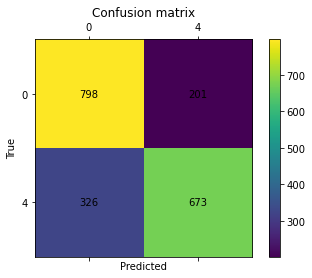

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)

categories=[0,4]
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()